In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

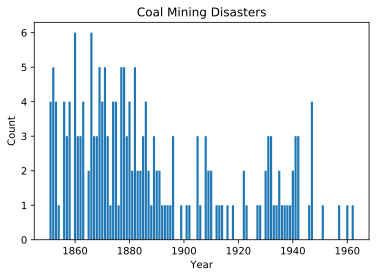

In [19]:
from pydataset import data
coal = data('coal')
coal['count']=1
coal = coal.apply(np.floor).groupby('date').sum().reset_index()
plt.bar(coal['date'], coal['count'])
plt.title("Coal Mining Disasters")
plt.xlabel('Year')
plt.ylabel('Count');

In [43]:
mod = pm.Model()
with mod:
    p = pm.Dirichlet('change_probs', np.ones(100)/5)
    T_1860 = pm.Categorical('changepoint', p)
    T = T_1860 + 1860
    μ = pm.HalfNormal('μ', sd=4, shape=2)
    grp = (coal['date'].values > T) * 1
    y_obs = pm.Normal('y_obs', mu=μ[grp], observed = coal['count'].values)

In [44]:
with mod:
    trace = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>NUTS: [μ_log__, change_probs_stickbreaking__]
INFO:pymc3:>NUTS: [μ_log__, change_probs_stickbreaking__]
>CategoricalGibbsMetropolis: [changepoint]
INFO:pymc3:>CategoricalGibbsMetropolis: [changepoint]
 89%|████████▉ | 893/1000 [00:08<00:01, 104.62it/s]/home/chad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 97%|█████████▋| 969/1000 [00:09<00:00, 106.24it/s]/home/chad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|█████████▉| 999/1000 [00:09<00:00, 106.86it/s]/home/chad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 1000/1000 [00:09<00:00, 106.87it/s]
/home/chad/anaconda3/lib/python3.6/site-p

In [45]:
%config InlineBackend.figure_format = 'png'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

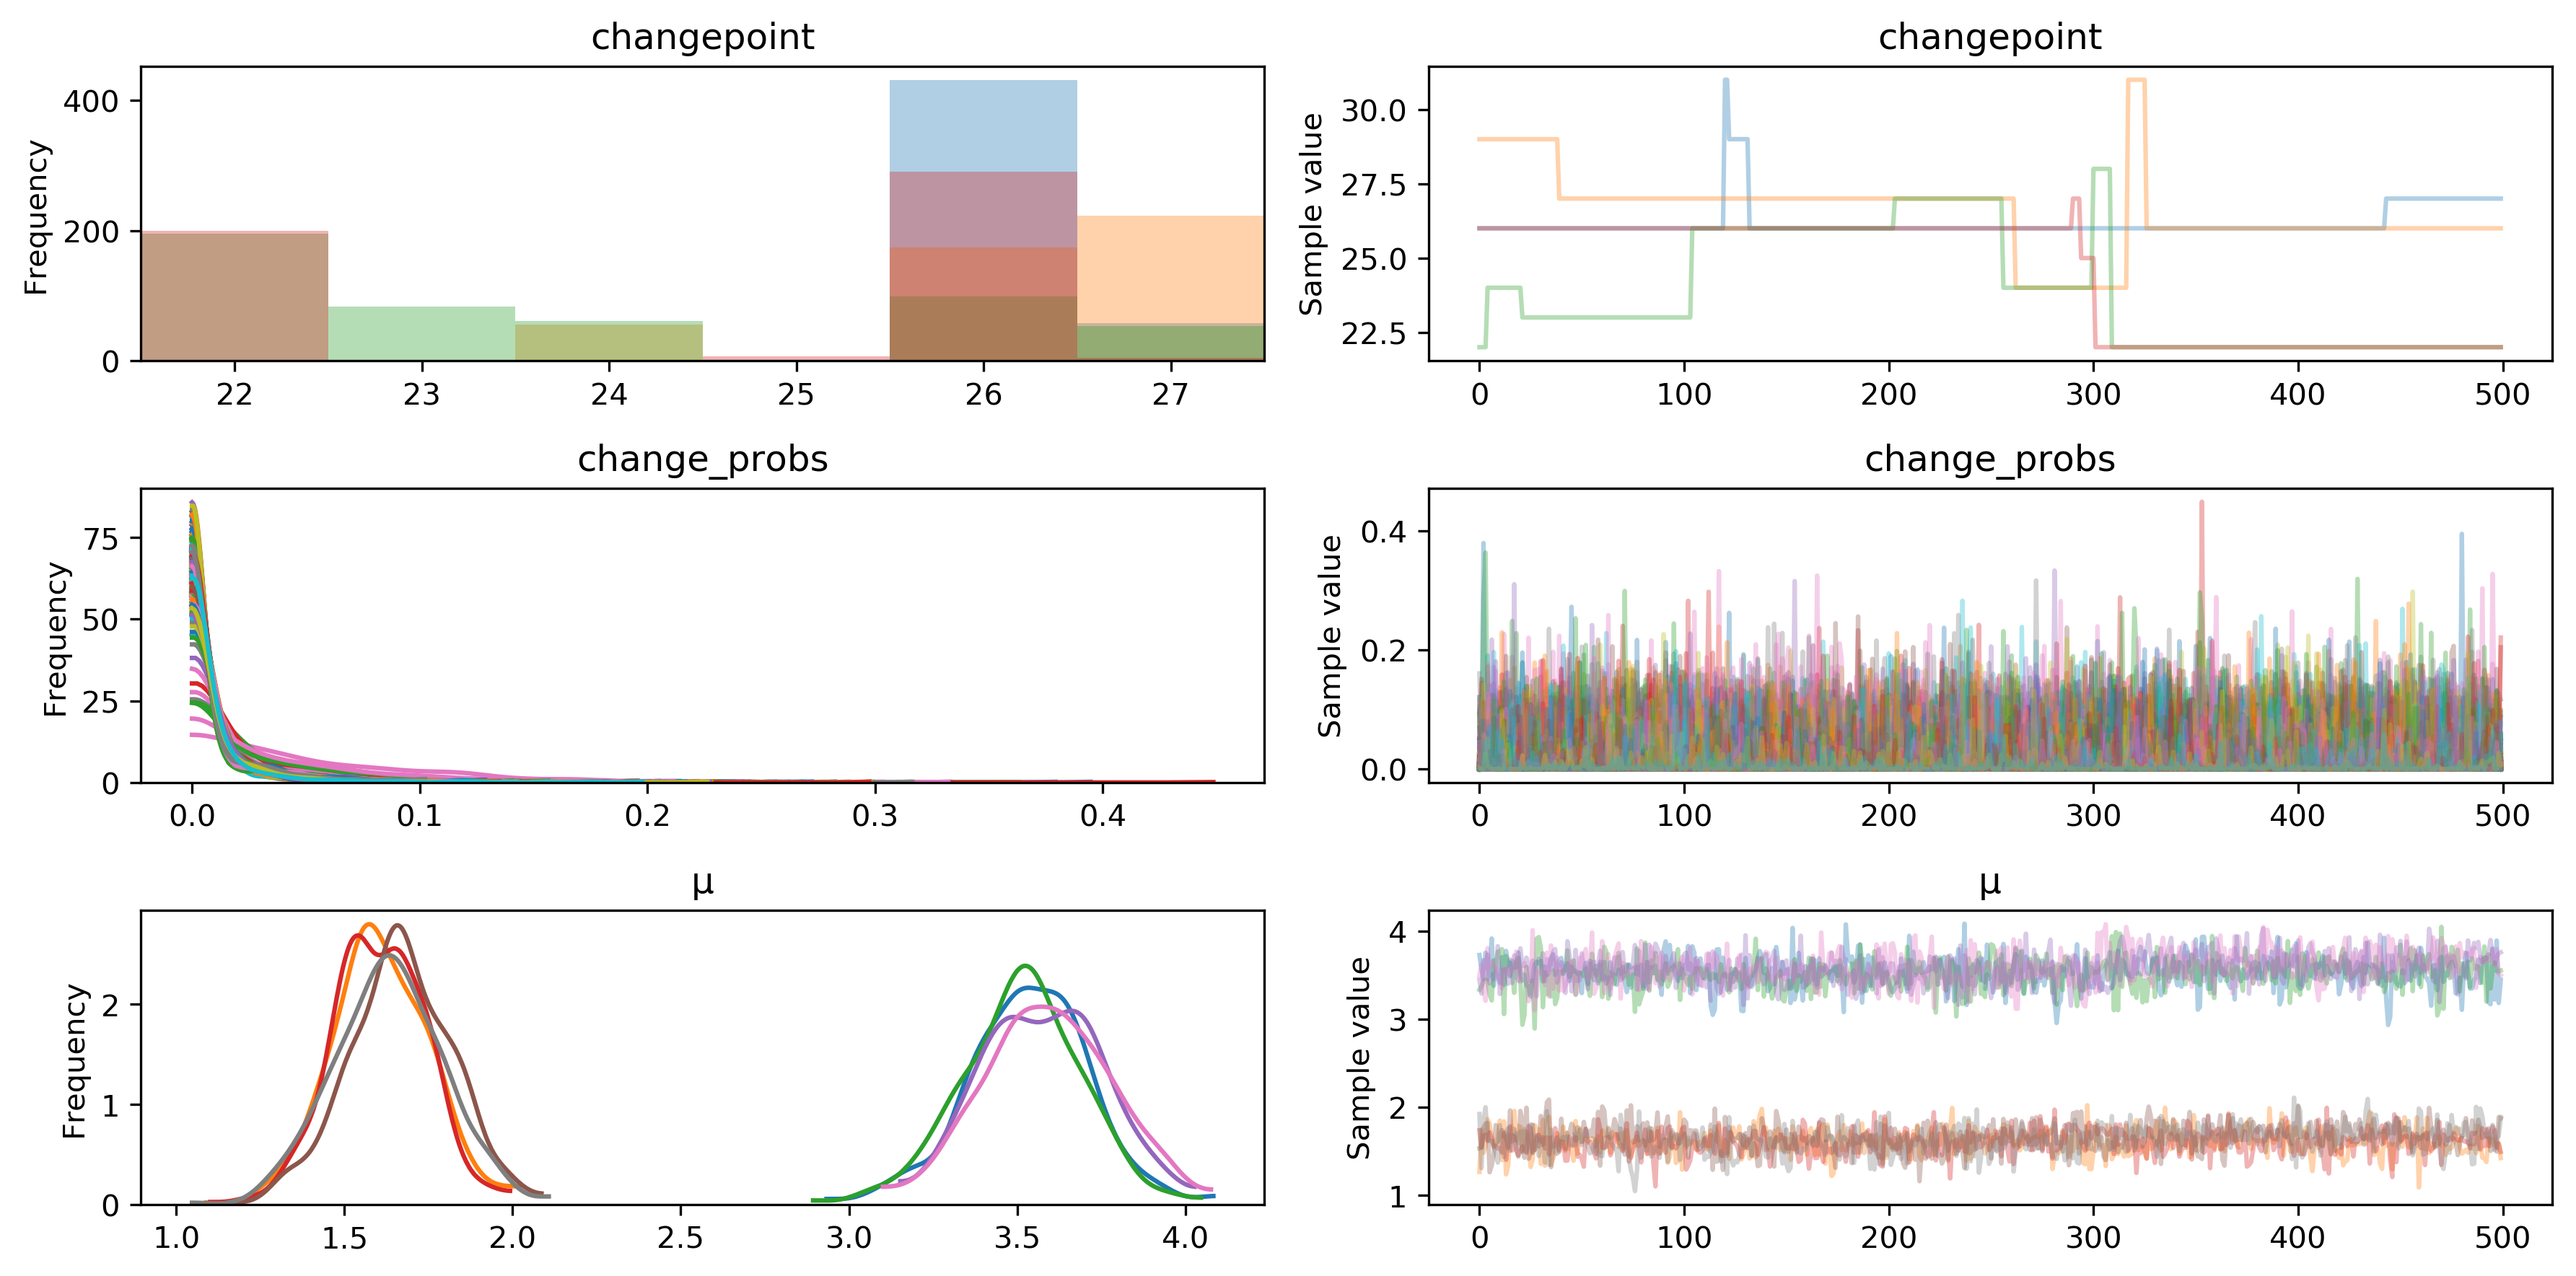

In [46]:
pm.traceplot(trace);

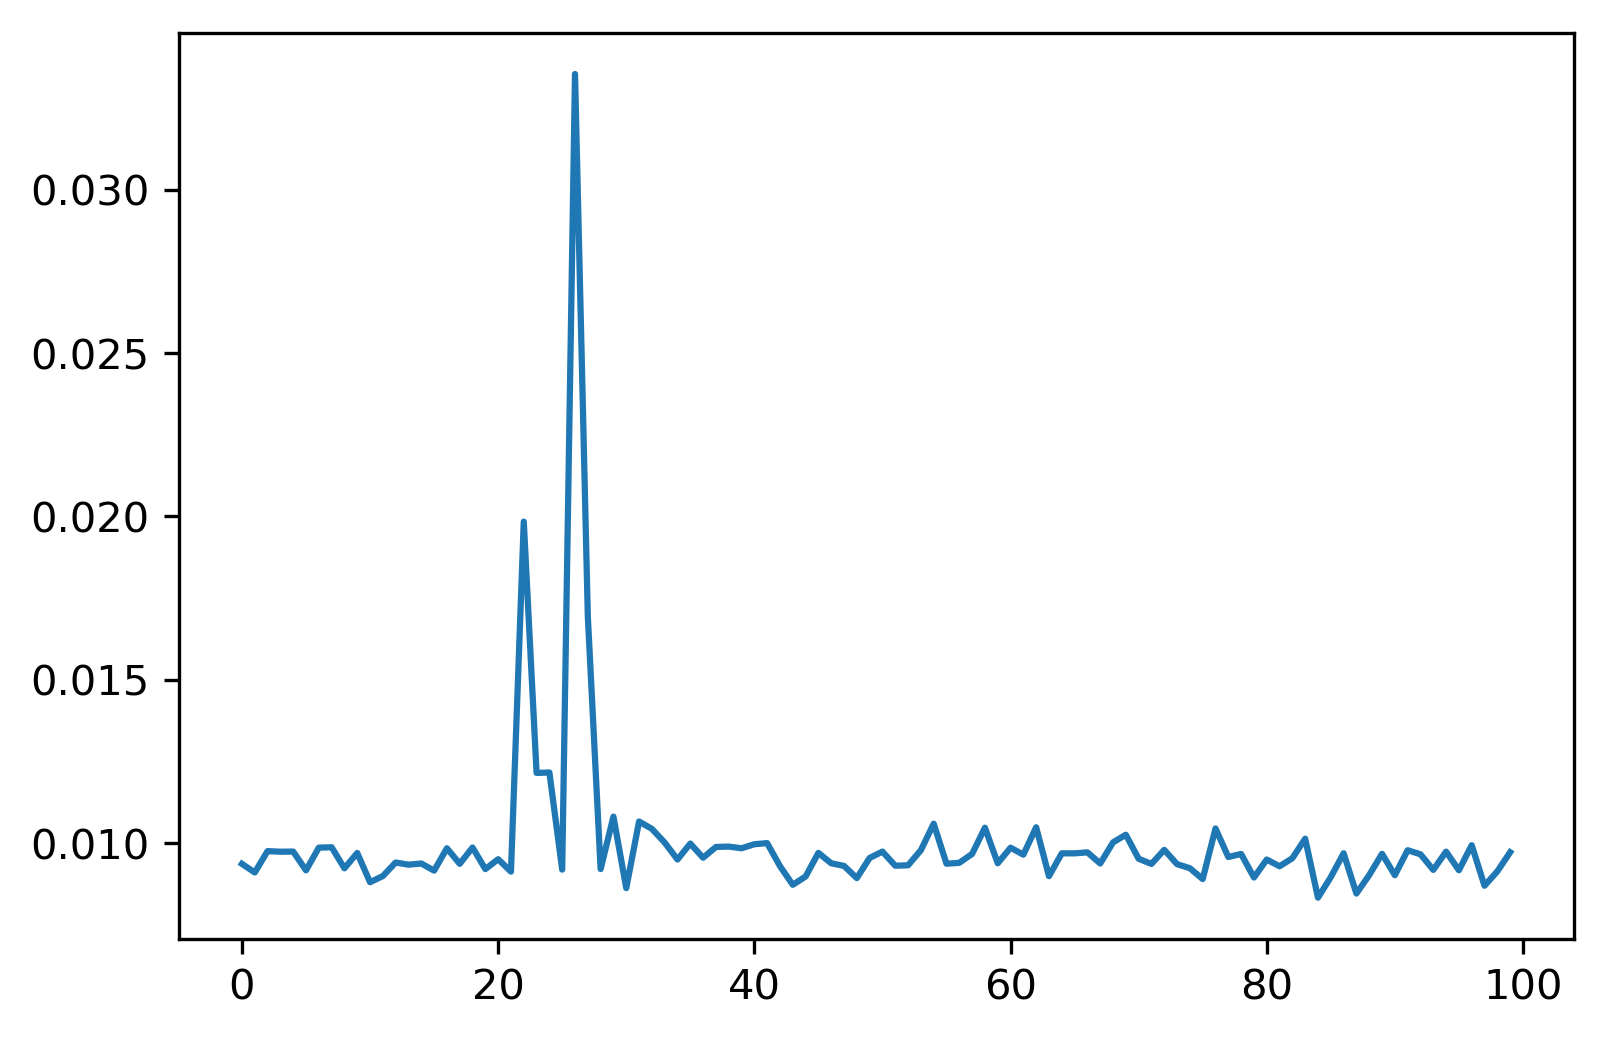

In [64]:
%config InlineBackend.figure_format = 'png'
plt.plot(trace['change_probs'].mean(0));

In [65]:
m = trace['change_probs']

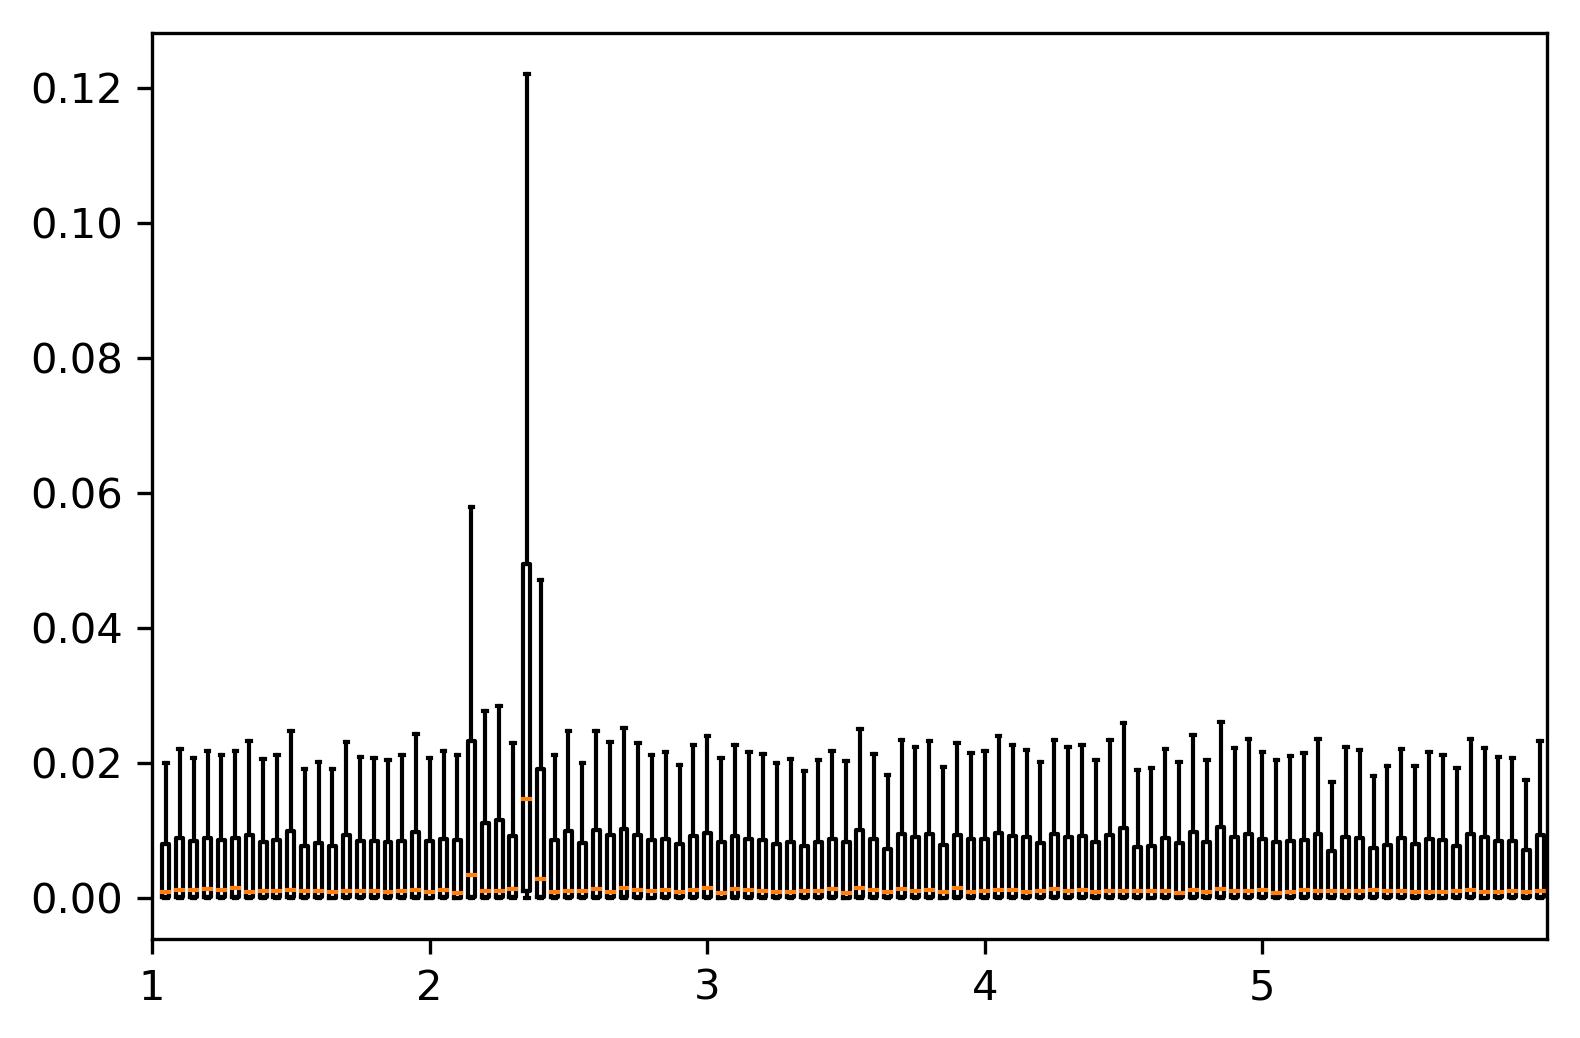

In [84]:
fig, ax = plt.subplots()
plt.boxplot(m, showfliers=False);
plt.xticks(range(0,100,20));

(20, 30)

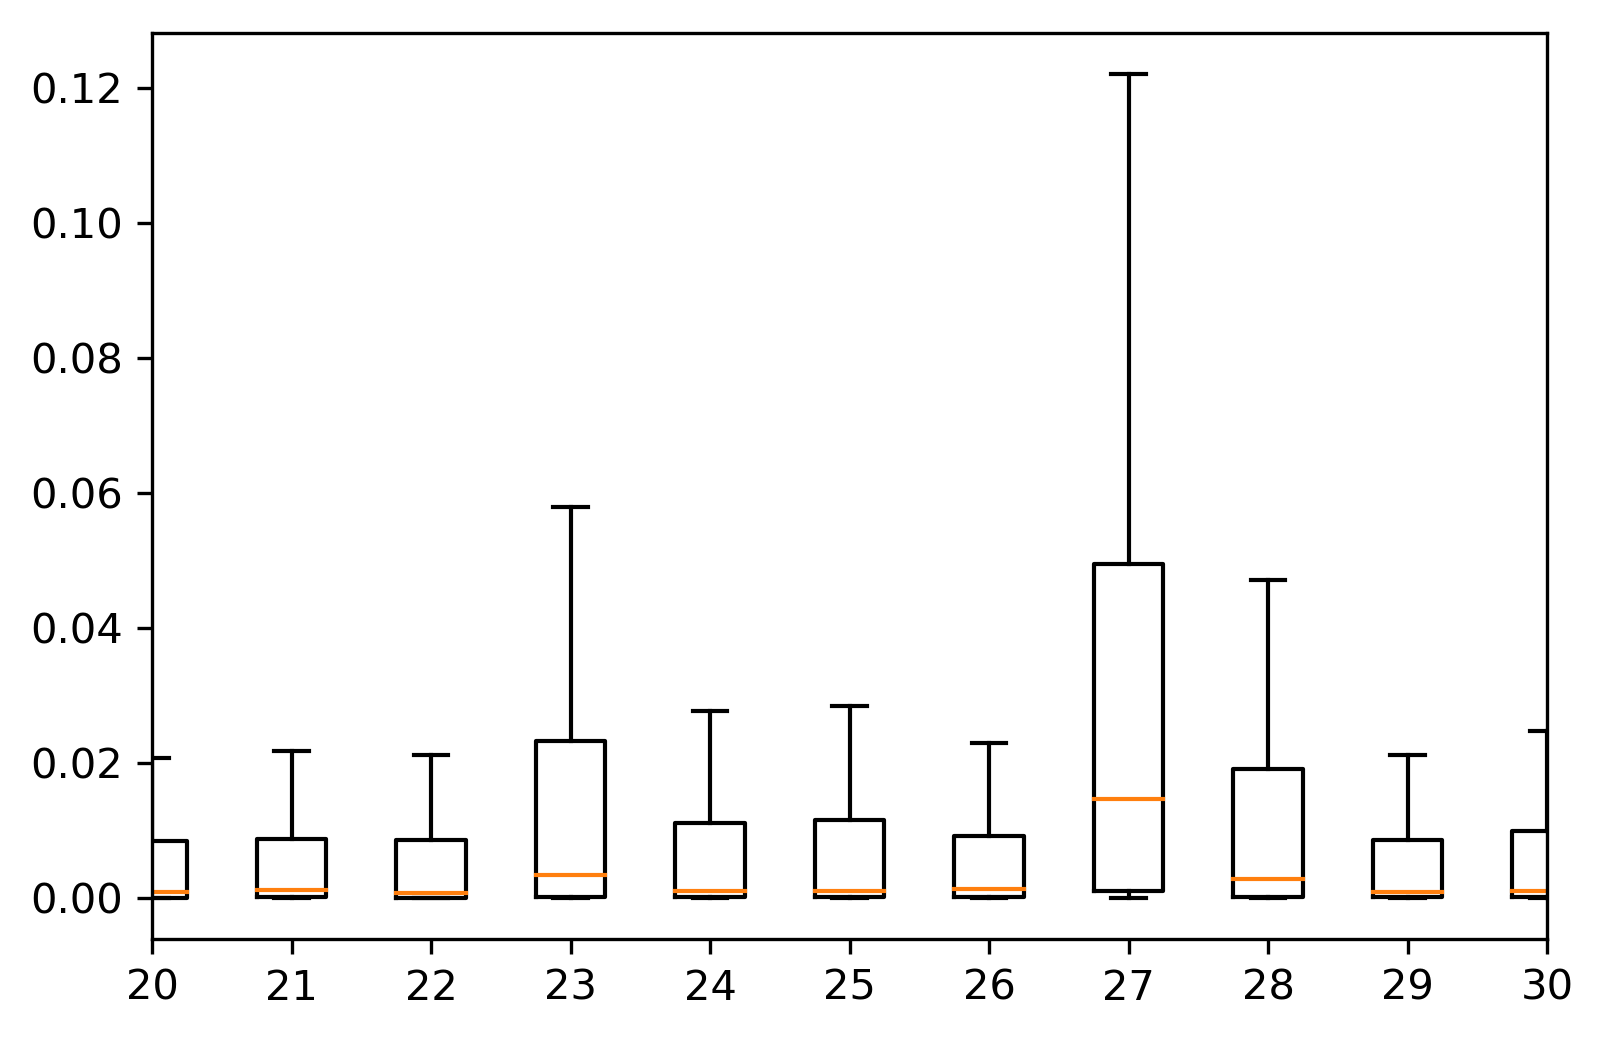

In [85]:
fig, ax = plt.subplots()
plt.boxplot(m, showfliers=False);
plt.xlim(20,30)

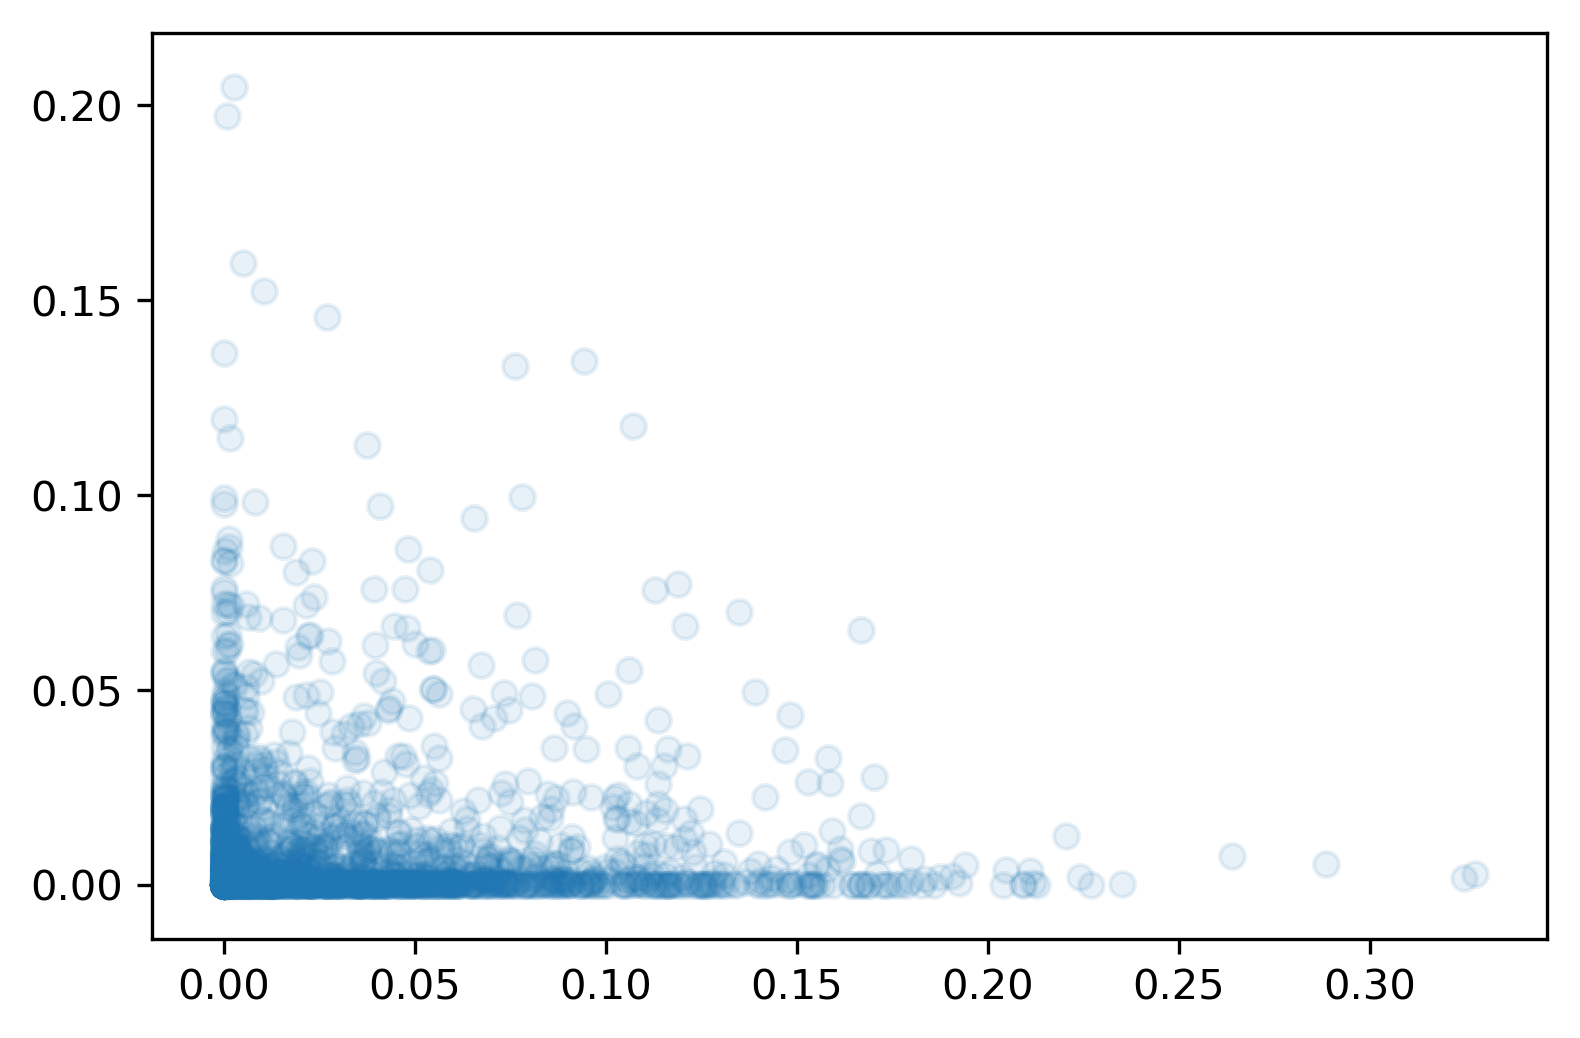

In [93]:
plt.scatter(m[:,26],m[:,25], alpha=0.1)

In [86]:
m.shape

(2000, 100)